# Example: Rhines analysis of radii of curvature.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import arcpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
source = 'E:\\Documents\\EVTEA - Paraguai\\Raios de Curvatura\\rhine\\'

## Create a shp with the centroids of the boat's polygons;

In [4]:
inFeatures = source+"B1_TMS_Niklas_11012012_MR_UTM_WGS84.shp"
outFeatureClass = source+"B1_TMS_Niklas_11012012_MR_UTM_POSTDAM_CENTER.shp"
arcpy.FeatureToPoint_management(inFeatures, outFeatureClass, "INSIDE")

<Result 'E:\\Documents\\EVTEA - Paraguai\\Raios de Curvatura\\rhine\\B1_TMS_Niklas_11012012_MR_UTM_POSTDAM_CENTER.shp'>

## Create shp with a polyline from the points

In [5]:
outFeatureLine = source+"B1_TMS_Niklas_11012012_MR_UTM_POSTDAM_LINE.shp"
arcpy.PointsToLine_management(outFeatureClass, outFeatureLine)

<Result 'E:\\Documents\\EVTEA - Paraguai\\Raios de Curvatura\\rhine\\B1_TMS_Niklas_11012012_MR_UTM_POSTDAM_LINE.shp'>

## Smooth the line with the PAEK algorithm

In [ ]:
import arcpy.cartography as CA

In [7]:
outFeatureSmoothLine = source+"B1_TMS_Niklas_11012012_MR_UTM_POSTDAM_LINE_PEAK_100.shp"

In [8]:
CA.SmoothLine(outFeatureLine, outFeatureSmoothLine, "PAEK", 300)

<Result 'E:\\Documents\\EVTEA - Paraguai\\Raios de Curvatura\\rhine\\B1_TMS_Niklas_11012012_MR_UTM_POSTDAM_LINE_PEAK_100.shp'>

## Create a shp of equidistant points from the line inputed

In [6]:
outFeatureSmoothPoints = source+"B1_TMS_Niklas_11012012_MR_UTM_POSTDAM_POINTS_PEAK_100_55.shp"

In [10]:
arcpy.ImportToolbox("E:\\Program Files (x86)\\ArcGIS\\Desktop10.3\\ArcToolbox\\Toolboxes\\CreatePointsLines.tbx") #change to your path

<module 'CreatePointsLines' (built-in)>

In [11]:
arcpy.CreatePointsLines_CreatePointsLines(outFeatureSmoothLine,"INTERVAL BY DISTANCE", "BEGINNING", "NO", "", 55, "NO", outFeatureSmoothPoints)

<Result 'E:\\Documents\\EVTEA - Paraguai\\Raios de Curvatura\\rhine\\B1_TMS_Niklas_11012012_MR_UTM_POSTDAM_POINTS_PEAK_100_55.shp'>

## Read the x,y data from the inputed points shp.

In [4]:
import geopandas as gpd

In [7]:
points = gpd.read_file(outFeatureSmoothPoints)#outFeatureSmoothPoints)
x = points.geometry.centroid.map(lambda points: points.x)
y = points.geometry.centroid.map(lambda points: points.y)

## Imports rcnav library

In [19]:
import rcnav

## Creates rcnav object with the x,y data

In [20]:
t2 = rcnav.rcnav(x,y)

## Runs the findRC() function that creates df

In [21]:
t2.findRC()

## Runs the cluster() function with eps=100, min_sample=2, RCmax = 1000

Estimated number of clusters: 14


C:\Anaconda\lib\site-packages\matplotlib\lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:
rcnav.py:177: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  mp['Validador'][(mp['D'].astype(int)).isin((CLS4.S.astype(int)).tolist())] = 1


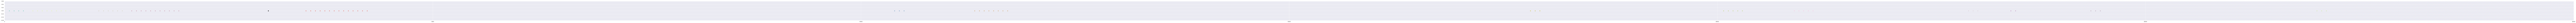

In [22]:
t2.cluster(100,2,1000)

## Plots an interactable html map.

In [24]:
mappath = 'rcnav\\'+'niklas_raios_1000.html'
t2.map(32,'U',mappath)

In [28]:
t2.mp.to_excel(source+'niklas_raios_1000.xlsx')

In [27]:
t2.mp.to_json('rcnav\\niklas_raios_1000.json')

## Distribuition of critical radii of curvature

In [30]:
c = t2.mp.RC2[t2.mp.Validador2 == 1]

In [ ]:
sns.distplot(c.tolist(), kde=False,color='grey')